# RECol: Results Evaluation using PR-AUC Metric

## Imports and path/file names (always run first)

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import lines
import statsmodels.formula.api as smf

In [3]:
# Set path of output results
curr_dir = os.getcwd()
path = str(curr_dir)+'/Result/RECol_Output'
kdd_path = str(curr_dir)+'/Result/RECol_Output_Kdd_v2'
baseline_path = str(curr_dir)+'/Result/Best_Baseline_model_Output'

In [4]:
folders = [x[0] for x in os.walk(path) if x != path][1:]
files = ['PR-AUC_for_Combined_feature_in_test',
         'PR-AUC_for_Combined_feature_in_train',
         'PR-AUC_for_Only-Re_feature_in_test',
         'PR-AUC_for_Only-Re_feature_in_train',
         'ROC_for_Combined_feature_in_test',
         'ROC_for_Combined_feature_in_train',
         'ROC_for_Only-Re_feature_in_test',
         'ROC_for_Only-Re_feature_in_train']
datasets = ['pen-local-unsupervised-ad.csv',
            'pen-global-unsupervised-ad.csv',
            'breast-cancer-unsupervised-ad.csv',
            'speech-unsupervised-ad.csv',
            'aloi-unsupervised-ad.csv',
            'shuttle-unsupervised-ad.csv',
            'letter-unsupervised-ad.csv',
            'satellite-unsupervised-ad.csv',
            'annthyroid-unsupervised-ad.csv']
baseline_files = ['PR-AUC_for_test', 'PR-AUC_for_train', 'ROC-AUC_for_test', 'ROC-AUC_for_train']
kdd_folders = [x[0] for x in os.walk(kdd_path) if x != path and 'results' not in x[0]][1:]

## RECol vs Baseline Comparison: which one is better?

In [5]:
train_file = files[1]
test_file = files[0]
train_onlyre_file = files[3]
test_onlyre_file = files[2]
train_baseline_file = baseline_files[1]
test_baseline_file = baseline_files[0]

# Load data
df = pd.DataFrame()
df_onlyre = pd.DataFrame()
for folder in folders:
    res = pd.read_csv(os.path.join(folder, train_file + '.csv'))
    res['folder'] = folder
    df = df.append(res)
    res_onlyre = pd.read_csv(os.path.join(folder, train_onlyre_file + '.csv'))
    res_onlyre['folder'] = folder
    df_onlyre = df_onlyre.append(res_onlyre)
algos = df.OD_Algo.unique()
algos_onlyre = df_onlyre.OD_Algo.unique()
baseline = pd.read_csv(os.path.join(baseline_path, train_baseline_file + '.csv'))

re_train_fold = []
re_train_algo = []
re_train_onlyre_fold = []
re_train_onlyre_algo = []
bl_train_algo = []
for dataset in datasets:
    fold_x = df.loc[df[dataset] == df[dataset].max(), 'folder'].values[0]
    algo_x = df.loc[df[dataset] == df[dataset].max(), 'OD_Algo'].values[0]
    fold_onlyre_x = df_onlyre.loc[df_onlyre[dataset] == df_onlyre[dataset].max(), 'folder'].values[0]
    algo_onlyre_x = df_onlyre.loc[df_onlyre[dataset] == df_onlyre[dataset].max(), 'OD_Algo'].values[0]
    algo_y = baseline.loc[baseline[dataset] == baseline[dataset].max(), 'OD_Algo'].values[0]
    re_train_fold.append(fold_x)
    re_train_algo.append(algo_x)
    re_train_onlyre_fold.append(fold_onlyre_x)
    re_train_onlyre_algo.append(algo_onlyre_x)
    bl_train_algo.append(algo_y)

df = pd.DataFrame()
for folder, algo in zip(re_train_fold, re_train_algo):
    res = pd.read_csv(os.path.join(folder, test_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    res['folder'] = folder
    df = df.append(res)
df_onlyre = pd.DataFrame()
for folder, algo in zip(re_train_onlyre_fold, re_train_onlyre_algo):
    res = pd.read_csv(os.path.join(folder, test_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    res['folder'] = folder
    df_onlyre = df_onlyre.append(res)
df_bl_test = pd.DataFrame()
baseline_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
for dataset, algo in zip(datasets, bl_train_algo):
    res = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    df_bl_test = df_bl_test.append(res)


re_test = []
onlyre_test = []
bl_test = []
diff_test = []
for dataset in datasets:
    x = df[dataset].max()
    y = df_bl_test[dataset].max()
    z = df_onlyre[dataset].max()
    re_test.append(x * 100)
    bl_test.append(y * 100)
    onlyre_test.append(z * 100)
    diff_test.append((x-y) * 100)


# Load data and Calculation for KDD
kdd_df = pd.DataFrame()
kdd_df_onlyre = pd.DataFrame()
for folder in kdd_folders:
    res = pd.read_csv(os.path.join(folder, train_file + '.csv'))
    res['folder'] = folder
    kdd_df = kdd_df.append(res)
    kdd_res_onlyre = pd.read_csv(os.path.join(folder, train_onlyre_file + '.csv'))
    kdd_res_onlyre['folder'] = folder
    kdd_df_onlyre = kdd_df_onlyre.append(kdd_res_onlyre)
kdd_algos = kdd_df.OD_Algo.unique()
kdd_algos_onlyre = kdd_df_onlyre.OD_Algo.unique()

kdd_re_train_fold = kdd_df.loc[kdd_df['kdd99-unsupervised-ad.csv'] == kdd_df['kdd99-unsupervised-ad.csv'].max(), 'folder'].values[0]
kdd_re_train_algo = kdd_df.loc[kdd_df['kdd99-unsupervised-ad.csv'] == kdd_df['kdd99-unsupervised-ad.csv'].max(), 'OD_Algo'].values[0]
kdd_re_train_onlyre_fold = kdd_df_onlyre.loc[kdd_df_onlyre['kdd99-unsupervised-ad.csv'] == kdd_df_onlyre['kdd99-unsupervised-ad.csv'].max(), 'folder'].values[0]
kdd_re_train_onlyre_algo = kdd_df_onlyre.loc[kdd_df_onlyre['kdd99-unsupervised-ad.csv'] == kdd_df_onlyre['kdd99-unsupervised-ad.csv'].max(), 'OD_Algo'].values[0]
kdd_bl_train_algo = baseline.loc[baseline['kdd99-unsupervised-ad.csv'] == baseline['kdd99-unsupervised-ad.csv'].max(), 'OD_Algo'].values[0]

# Load data
kdd_df = pd.read_csv(os.path.join(kdd_re_train_fold, test_file + '.csv'))
kdd_df = kdd_df[kdd_df['OD_Algo'] == kdd_re_train_algo]
kdd_df['folder'] = kdd_re_train_fold

kdd_df_onlyre = pd.read_csv(os.path.join(kdd_re_train_onlyre_fold, test_onlyre_file + '.csv'))
kdd_df_onlyre = kdd_df_onlyre[kdd_df_onlyre['OD_Algo'] == kdd_re_train_onlyre_algo]
kdd_df_onlyre['folder'] = kdd_re_train_onlyre_fold

kdd_df_bl_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
kdd_df_bl_test = kdd_df_bl_test[kdd_df_bl_test['OD_Algo'] == kdd_bl_train_algo]

x = kdd_df['kdd99-unsupervised-ad.csv'].max()
y = kdd_df_bl_test['kdd99-unsupervised-ad.csv'].max()
z = kdd_df_onlyre['kdd99-unsupervised-ad.csv'].max()
re_test.append(x * 100)
bl_test.append(y * 100)
onlyre_test.append(z * 100)
diff_test.append((x-y) * 100)
all_datasets = datasets + ['kdd99-unsupervised-ad.csv']
results = {'Dataset': all_datasets, 'Baseline': bl_test, 'RECols': re_test, 'Difference': diff_test,}
onlyre_results = {'Dataset': all_datasets, 'RECols + Standard': re_test, 'RECols Only': onlyre_test,}

# Display Results
pd.DataFrame(results).round(2)

,Dataset,Baseline,RECols,Difference
0,pen-local-unsupervised-ad.csv,17.57,50.08,32.51
1,pen-global-unsupervised-ad.csv,93.83,86.99,-6.84
2,breast-cancer-unsupervised-ad.csv,85.00,79.37,-5.63
3,speech-unsupervised-ad.csv,2.24,50.81,48.57
4,aloi-unsupervised-ad.csv,11.65,9.73,-1.92
5,shuttle-unsupervised-ad.csv,98.31,96.36,-1.95
6,letter-unsupervised-ad.csv,40.26,53.13,12.87
7,satellite-unsupervised-ad.csv,55.83,68.07,12.24
8,annthyroid-unsupervised-ad.csv,15.67,36.87,21.20
9,kdd99-unsupervised-ad.csv,71.17,69.42,-1.75


**RECol vs Baseline Output Summary:**

RECols improved the result in 5 out of 10 datasets.

## Plots for RECol vs Baseline Comparison

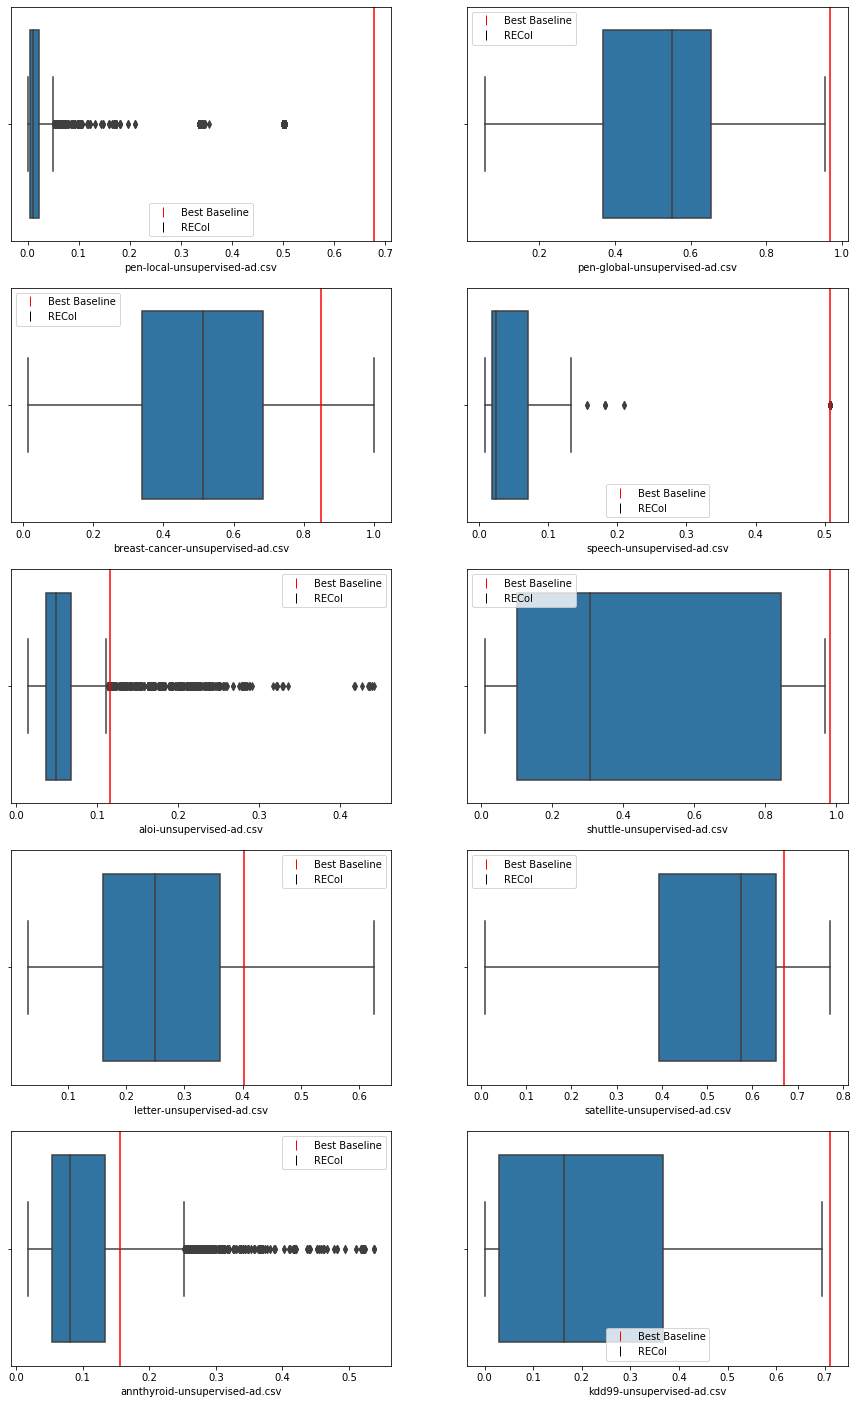

In [6]:
# Choose csv file types (take care to choose the pairs)
# PR-AUC
file = files[0]
baseline_file = baseline_files[0]

# Load data
df = pd.DataFrame()
for folder in folders:
    res = pd.read_csv(os.path.join(folder, file + '.csv'))
    df = df.append(res)
algos = df.OD_Algo.unique()
baseline = pd.read_csv(os.path.join(baseline_path, baseline_file + '.csv'))

# Load data for kdd
kdd_df = pd.DataFrame()
for folder in kdd_folders:
    res = pd.read_csv(os.path.join(folder, file + '.csv'))
    kdd_df = kdd_df.append(res)
kdd_algos = kdd_df.OD_Algo.unique()
kdd_df = kdd_df[['OD_Algo', 'kdd99-unsupervised-ad.csv']]
kdd_baseline = pd.read_csv(os.path.join(baseline_path, baseline_file + '.csv'))[['OD_Algo', 'kdd99-unsupervised-ad.csv']]

handles = []
labels = ['Best Baseline', 'RECol']
colors = ['r', 'k']
for c in colors:
    vertical_line = lines.Line2D([], [],  marker='|', linestyle='None', color=c, markersize=10, markeredgewidth=1)
    handles.append(vertical_line)

plt.figure(figsize=(15, 25))
for index, dataset in enumerate(datasets):
    plt.subplot(5,2,index+1)
    sns.boxplot(x=df[dataset])
    y = baseline[dataset].max()  # alternatively compare to .mean()
    plt.plot([y, y], [-0.5, 0.5], color='r')
    plt.legend(handles, labels)
# Plotting KDD results
plt.subplot(5,2,len(datasets)+1)
sns.boxplot(x=kdd_df['kdd99-unsupervised-ad.csv'])
y = kdd_baseline['kdd99-unsupervised-ad.csv'].max()  # alternatively compare to .mean()
plt.plot([y, y], [-0.5, 0.5], color='r')
plt.legend(handles, labels)
plt.show()

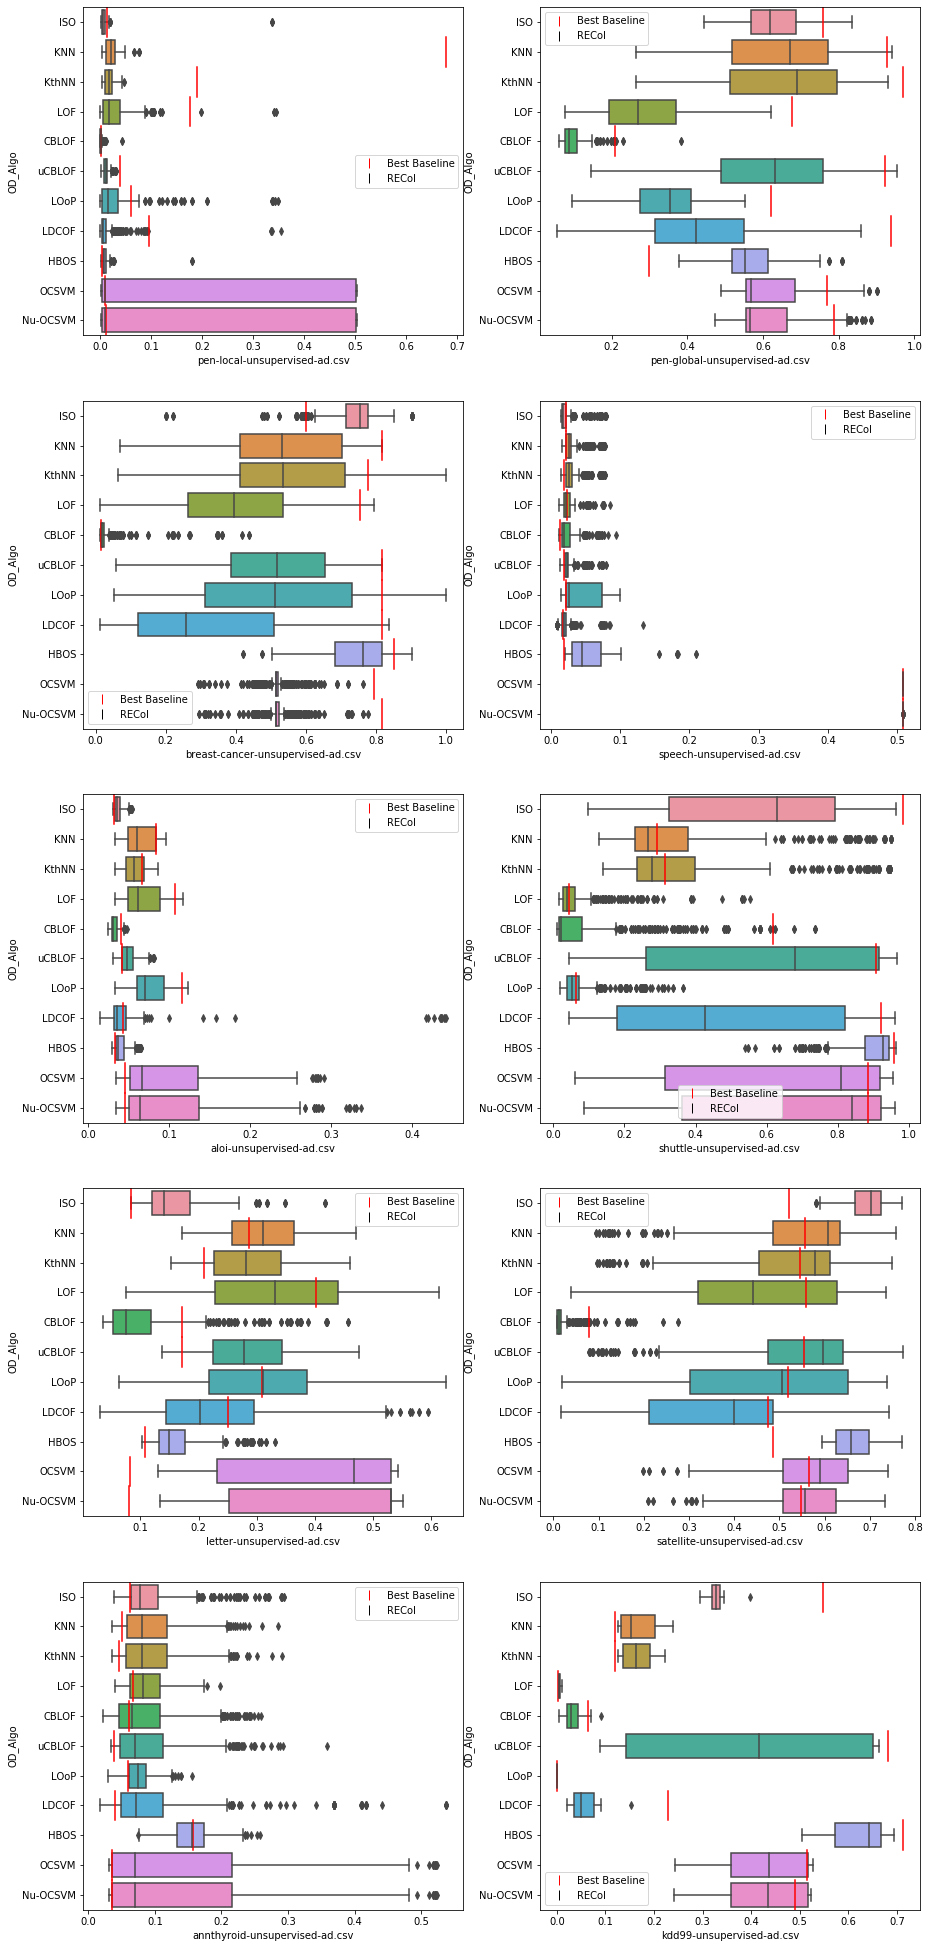

In [7]:
handles = []
labels = ['Best Baseline', 'RECol']
colors = ['r', 'k']
for c in colors:
    vertical_line = lines.Line2D([], [],  marker='|', linestyle='None', color=c, markersize=10, markeredgewidth=1)
    handles.append(vertical_line)

plt.figure(figsize=(15, 35))
for index, dataset in enumerate(datasets):
    plt.subplot(5,2,index+1)
    sns.boxplot(y=df['OD_Algo'], x=df[dataset], data=df)
    y = baseline[dataset]
    i = 0
    for algo in algos:
        y = baseline.loc[baseline.OD_Algo == algo, dataset].values[0]
        plt.plot([y, y], [-0.5 + i, 0.5 + i], color='r')
        i += 1
    plt.legend(handles, labels)
# Plotting KDD Result
plt.subplot(5,2,len(datasets)+1)
sns.boxplot(y=kdd_df['OD_Algo'], x=kdd_df['kdd99-unsupervised-ad.csv'], data=kdd_df)
y = kdd_baseline['kdd99-unsupervised-ad.csv']
i = 0
for algo in algos:
    y = kdd_baseline.loc[kdd_baseline.OD_Algo == algo, 'kdd99-unsupervised-ad.csv'].values[0]
    plt.plot([y, y], [-0.5 + i, 0.5 + i], color='r')
    i += 1
plt.legend(handles, labels)
plt.show()

## RECol-OD vs Baseline Comparison

In [8]:
red_train_file = files[3]
red_test_file = files[2]
# Load data
df = pd.DataFrame()
for folder in folders:
    res = pd.read_csv(os.path.join(folder, red_train_file + '.csv'))
    res['folder'] = folder
    res = res[(res.OD_Algo == 'RED1') | (res.OD_Algo == 'RED2')]
    df = df.append(res)
algos = df.OD_Algo.unique()

baseline = pd.read_csv(os.path.join(baseline_path, train_baseline_file + '.csv'))

re_train_fold = []
re_train_algo = []
bl_train_algo = []
for dataset in datasets:
    fold_x = df.loc[df[dataset] == df[dataset].max(), 'folder'].values[0]
    algo_x = df.loc[df[dataset] == df[dataset].max(), 'OD_Algo'].values[0]
    algo_y = baseline.loc[baseline[dataset] == baseline[dataset].max(), 'OD_Algo'].values[0]
    re_train_fold.append(fold_x)
    re_train_algo.append(algo_x)
    bl_train_algo.append(algo_y)
    
# Load data
df = pd.DataFrame()
for folder, algo in zip(re_train_fold, re_train_algo):
    res = pd.read_csv(os.path.join(folder, red_test_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    res['folder'] = folder
    df = df.append(res)

df_bl_test = pd.DataFrame()
baseline_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
for dataset, algo in zip(datasets, bl_train_algo):
    res = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    df_bl_test = df_bl_test.append(res)
 
re_test = []
bl_test = []
bl_mean = []
diff_test = []
diff_mean = []
for dataset in datasets:
    x = df[dataset].max()
    y = df_bl_test[dataset].max()
    z = baseline_test[dataset].mean()
    re_test.append(x * 100)
    bl_test.append(y * 100)
    bl_mean.append(z * 100)
    diff_test.append((x-y) * 100)
    diff_mean.append((x-z) * 100)
results = {'dataset': datasets, 'best baseline algo': bl_test, 'average baseline algo': bl_mean, 'RED algo': re_test, 'difference to best algo': diff_test, 'difference to average algo': diff_mean}

# pd.DataFrame(results).round(2).to_latex('figs/table_baseline_RED_comparison.tex')
pd.DataFrame(results)


# Load data and Calculation for KDD
kdd_df = pd.DataFrame()
for folder in kdd_folders:
    res = pd.read_csv(os.path.join(folder, red_train_file + '.csv'))
    res['folder'] = folder
    res = res[(res.OD_Algo == 'RED1') | (res.OD_Algo == 'RED2')]
    kdd_df = kdd_df.append(res)
kdd_algos = kdd_df.OD_Algo.unique()
kdd_algos = [algo for algo in kdd_algos if algo != 'LOoP']

re_train_fold = kdd_df.loc[kdd_df['kdd99-unsupervised-ad.csv'] == kdd_df['kdd99-unsupervised-ad.csv'].max(), 'folder'].values[0]
re_train_algo = kdd_df.loc[kdd_df['kdd99-unsupervised-ad.csv'] == kdd_df['kdd99-unsupervised-ad.csv'].max(), 'OD_Algo'].values[0]
bl_train_algo = baseline.loc[baseline['kdd99-unsupervised-ad.csv'] == baseline['kdd99-unsupervised-ad.csv'].max(), 'OD_Algo'].values[0]
    
# Load data
kdd_df = pd.read_csv(os.path.join(re_train_fold, red_test_file + '.csv'))
kdd_df = kdd_df[kdd_df['OD_Algo'] == re_train_algo]
kdd_df['folder'] = re_train_fold

baseline_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
df_bl_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))
df_bl_test = df_bl_test[df_bl_test['OD_Algo'] == bl_train_algo]

x = kdd_df['kdd99-unsupervised-ad.csv'].max()
y = df_bl_test['kdd99-unsupervised-ad.csv'].max()
z = baseline_test['kdd99-unsupervised-ad.csv'].mean()
re_test.append(x * 100)
bl_test.append(y * 100)
bl_mean.append(z * 100)
diff_test.append((x-y) * 100)
diff_mean.append((x-z) * 100)
results = {'Dataset': all_datasets, 'Best Baseline': bl_test, 'Avg. Baseline': bl_mean, 'RECol-OD': re_test, 'Difference to Best': diff_test, 'Difference to Avg.': diff_mean}
pd.DataFrame(results).round(2)

,Dataset,Best Baseline,Avg. Baseline,RECol-OD,Difference to Best,Difference to Avg.
0,pen-local-unsupervised-ad.csv,17.57,10.70,2.08,-15.49,-8.63
1,pen-global-unsupervised-ad.csv,93.83,68.62,73.84,-19.99,5.23
2,breast-cancer-unsupervised-ad.csv,85.00,68.98,81.67,-3.33,12.68
3,speech-unsupervised-ad.csv,2.24,10.04,7.10,4.86,-2.94
4,aloi-unsupervised-ad.csv,11.65,5.83,9.55,-2.10,3.72
5,shuttle-unsupervised-ad.csv,98.31,63.61,86.87,-11.44,23.26
6,letter-unsupervised-ad.csv,40.26,18.67,41.96,1.70,23.29
7,satellite-unsupervised-ad.csv,55.83,50.65,68.89,13.06,18.24
8,annthyroid-unsupervised-ad.csv,15.67,5.96,34.50,18.83,28.54
9,kdd99-unsupervised-ad.csv,71.17,34.48,25.91,-45.26,-8.57


## Analysis by Dataset and OD Algorithm for RECol (Original + Recol features)

In [9]:
# Load data
df = pd.DataFrame()
for folder in folders:
    res = pd.read_csv(os.path.join(folder, train_file + '.csv'))
    res['folder'] = folder
    df = df.append(res)
algos = df.OD_Algo.unique()

baseline = pd.read_csv(os.path.join(baseline_path, train_baseline_file + '.csv'))

re_train_fold = []
re_train_algo = []
for dataset in datasets:
    for algo in algos:
        temp = df[df['OD_Algo'] == algo]
        fold_x = temp.loc[temp[dataset] == temp[dataset].max(), 'folder'].values[0]
        re_train_fold.append(fold_x)
        re_train_algo.append(algo)
    
# Load data
df = pd.DataFrame()
for folder, algo in zip(re_train_fold, re_train_algo):
    res = pd.read_csv(os.path.join(folder, test_file + '.csv'))
    res = res[res['OD_Algo'] == algo]
    res['folder'] = folder
    df = df.append(res)

df_bl_test = pd.read_csv(os.path.join(baseline_path, test_baseline_file + '.csv'))

re_test = []
bl_test = []
diff_test = []
data_algo = []
for dataset in datasets:
    for algo in algos:
        x = df.loc[df['OD_Algo'] == algo, dataset].max()
        y = df_bl_test.loc[df_bl_test['OD_Algo'] == algo, dataset].max()
        re_test.append(x * 100)
        bl_test.append(y * 100)
        diff_test.append((x-y) * 100)
        data_algo.append(dataset + '___' + algo)
results = {'Dataset_Algo': data_algo, 'Best_Baseline': bl_test, 'RECol': re_test, 'Difference': diff_test}

# Display Results for 100 rows
pd.set_option('display.max_rows', 30)
pd.DataFrame(results)

,Dataset_Algo,Best_Baseline,RECol,Difference
0,pen-local-unsupervised-ad.csv___ISO,1.44,1.680070,0.240070
1,pen-local-unsupervised-ad.csv___KNN,67.78,4.903006,-62.876994
2,pen-local-unsupervised-ad.csv___KthNN,19.05,2.790035,-16.259965
3,pen-local-unsupervised-ad.csv___LOF,17.57,7.775725,-9.794275
4,pen-local-unsupervised-ad.csv___CBLOF,0.31,0.505747,0.195747
...,...,...,...,...
94,annthyroid-unsupervised-ad.csv___LOoP,6.03,11.335882,5.305882
95,annthyroid-unsupervised-ad.csv___LDCOF,4.08,36.870147,32.790147
96,annthyroid-unsupervised-ad.csv___HBOS,15.67,21.929101,6.259101
97,annthyroid-unsupervised-ad.csv___OCSVM,3.55,24.015735,20.465735


In [10]:
pd.DataFrame(results)['Difference'].mean()

8.33179726190337

In [11]:
pd.DataFrame(results)['Difference'].median()

5.684527121844852

In [12]:
sum(pd.DataFrame(results)['Difference'] >= 0.0) / len(pd.DataFrame(results)['Difference']) * 100

75.75757575757575

In [13]:
sum(pd.DataFrame(results)['Difference'] >= 5.0) / len(pd.DataFrame(results)['Difference']) * 100

54.54545454545454

In [14]:
ddd = pd.DataFrame(results)
ddd = ddd[ddd.Best_Baseline <= 95]
sum(ddd['Difference'] >= 5.0) / len(ddd['Difference']) * 100

56.25

#### Output Summary:
- the average improvement (given dataset and algorithm) by adding RECol features is 8.3 percentage points in PR-AUC
- the median improvement is 5.7 percentage points
- in 75.8% percent of cases we see an improved PR-AUC metric
- in 54.5% percent of cases the improvement is larger than 5 percentage points in the PR-AUC metric